In [20]:
import pandas as pd
import scipy.io
import numpy as np

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


### Split the data into a training, development and test set.

In [2]:
from keras.datasets import mnist
import tensorflow as tf
data = mnist.load_data()

DATASET_SIZE = 70000
TRAIN_RATIO = 0.7
VALIDATION_RATIO = 0.15
TEST_RATIO = 0.15
r = 10

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

X = np.concatenate([x_train, x_test])
y = np.concatenate([y_train, y_test])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=(1-TRAIN_RATIO))
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=((TEST_RATIO/(VALIDATION_RATIO+TEST_RATIO))))

X_train = X_train.reshape((X_train.shape[0], 28*28)).astype('float32')
X_val = X_val.reshape((X_val.shape[0], 28*28)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28*28)).astype('float32')

print(X_train.shape), print(y_train.shape)
print(X_val.shape), print(y_val.shape)
print(X_test.shape), print(y_test.shape)



(48999, 784)
(48999,)
(10500, 784)
(10500,)
(10501, 784)
(10501,)


(None, None)

# (1) Random Forest 

- RANDOM FOREST was chosen as the decorrelating of trees results in the reduction of variance, making the average of the resulting trees more reliable. 


- MAX_DEPTH parameter was chosen. Max_depth is defined as the longest path between the root node and the leaf node, and we can set a limit up to what depth we want every tree in the random forest to grow. 


- As per the graph below, max_depth = 8 is an appropriate value as the curve is starting to flatten out here.


- Confusion Matrix: The model performed relatively accurately (0.9226740310446624). This can be seen by the large numbers on the diagonal with much smaller values everywhere else. The number 9 struggled the most, misclassifying the number 4 66 times, 7 40 times, and 8 27 times.  The number 8 performed second worst with regards to overall misclassification (111), while number 7 misclassified number 9 31 times, and the number 2 misclassified the number 7 23 times.


- Accuracy: 0.9702885439481954
- precision: 0.9702885439481954
- recall: 0.9702885439481954
- fscore: 0.9702885439481954


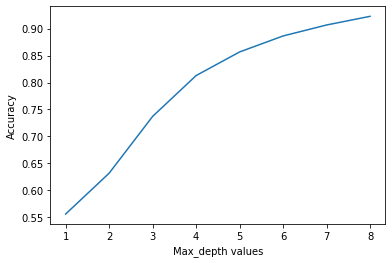

In [14]:
# d = max_depth and r = random state. 
d = 10
r = 10

random_forest = RandomForestClassifier(max_depth=10, random_state=r)
random_forest.fit(X_train, y_train)

# Create training score list and validation score list. Create loop with random forest classifier that trains
# the model. Then plot to see what the optimal max_depth value is.  
random_forest_depths = range(1, max_depth+1)

random_forest_train_scores = []
random_forest_val_scores = [] 

for d in random_forest_depths:
    clf = RandomForestClassifier(max_depth=d, random_state=r)
    clf.fit(X_train, y_train)

    train_score = clf.score(X_train, y_train) 
    rem_score = clf.score(X_val, y_val)
    random_forest_train_scores.append(train_score)
    random_forest_val_scores.append(rem_score)

fig, ax = plt.subplots()
ax.plot(random_forest_depths, random_forest_val_scores)
plt.xlabel("Max_depth values")
plt.ylabel("Accuracy")
ax.xaxis.set_ticks(random_forest_depths)
plt.show()

Accuracy: 0.9226740310446624


0.9226740310446624

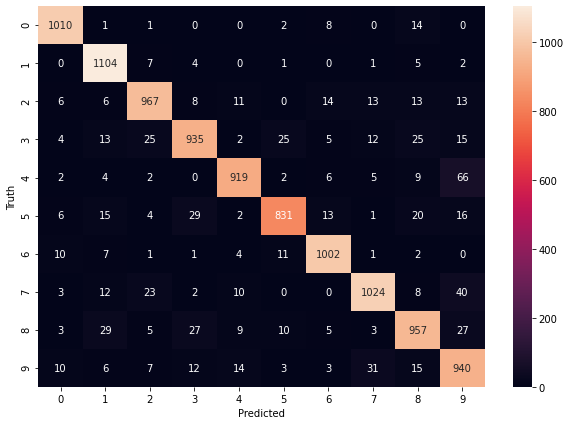

In [15]:
# CONFUSION MATRIX
d = 8
r = 10

clf = RandomForestClassifier(max_depth=d, random_state=r)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test,y_pred))


cmrforest = confusion_matrix(y_test , y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cmrforest ,annot=True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
clf.score(X_test,y_test)


In [3]:
# d = max_depth and r = random state. 
d = 8
r = 10

forest = RandomForestClassifier(n_estimators=80, max_depth=d, random_state=r)
forest.fit(X_train, y_train)

#Train the model using the training sets y_pred=clf.predict(X_test)

clf = RandomForestClassifier()

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

# Calculate accuracy, precision, recall and f1-score.
precision, recall, fscore, support = score(y_test, y_pred, average='micro')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))


Accuracy: 0.9702885439481954
precision: 0.9702885439481954
recall: 0.9702885439481954
fscore: 0.9702885439481954
support: None


# BAGGING

- Bagging helps in the reduction of variance, hence eliminating the overfitting. 


- Max_samples parameter chosen. This determines what fraction of the original dataset is given to any individual tree. We want to ascertain whether we can allocate a lesser fraction of bootstrapped data to each decision tree. As a result, the training time of the Random Forest model will be reduced drastically.


- Attempt to use the GridSearchCV module to ascertain the best max_samples value was unsuccessful (my computer not powerful enough to process), so the value was attained manually (0.3 returning the highest accuracy value):

    max_samples = 0.1: Accuracy ensemble: 0.9272450242834016
    max_samples = 0.3: Accuracy ensemble: 0.9353394914770022
    max_samples = 0.5: Accuracy ensemble: 0.9320064755737549
    max_samples = 0.7: Accuracy ensemble: 0.932196933625369
    max_samples = 0.9: Accuracy ensemble: 0.9276259403866298
    
    
- Confusion Matrix: The model performed relatively accurately (Accuracy=0.9353394914770022). This can be seen by the large numbers on the diagonal with much smaller values everywhere else. The number 9 struggled the most, misclassifying the number 4 51 times, 7 31 times, and 8 26 times.  The number 5 performed second worst with regards to overall misclassification (82).


- Accuracy: 0.9353394914770022
- precision: 0.9353394914770022
- recall: 0.9353394914770022
- fscore: 0.9353394914770022


In [33]:
# Manually ascertain what the optimal max_samples value is by running the code below for valrious values.

base = DecisionTreeClassifier(max_depth=10)
ensemble = BaggingClassifier(base_estimator=base, n_estimators=80, max_samples=0.9,random_state=10)

base.fit(X_train,y_train)
ensemble.fit(X_train,y_train)

print("Accuracy base:",base.score(X_test, y_test))
print("Accuracy ensemble:",ensemble.score(X_test, y_test))

# MAX_SAMPLES Values

# max_samples = 0.1: Accuracy ensemble:0.9272450242834016
# max_samples = 0.3: Accuracy ensemble: 0.9353394914770022
# max_samples = 0.5: Accuracy ensemble: 0.9320064755737549
# max_samples = 0.7: Accuracy ensemble: 0.932196933625369
# max_samples = 0.9: Accuracy ensemble: 0.9276259403866298



Accuracy base: 0.8562041710313304
Accuracy ensemble: 0.9276259403866298


Accuracy: 0.9353394914770022


0.9353394914770022

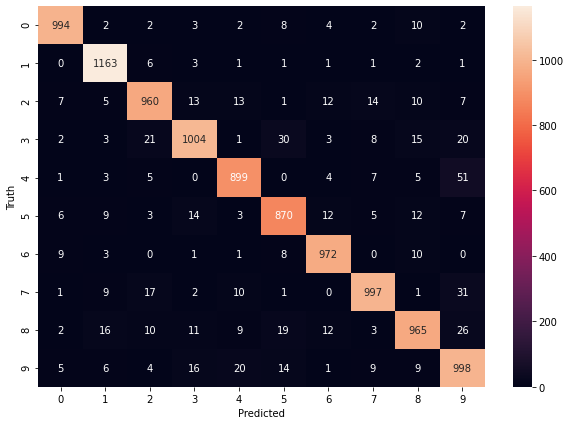

In [34]:
# CONFUSION MATRIX
d = 8
r = 10

clf = BaggingClassifier(base_estimator=base, n_estimators=80, max_samples=0.3,random_state=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test,y_pred))


cmrbagging = confusion_matrix(y_test , y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cmrbagging ,annot=True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
clf.score(X_test,y_test)


In [35]:
# Calculate accuracy, precision, recall and f1-score.
precision, recall, fscore, support = score(y_test, y_pred, average='micro')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

Accuracy: 0.9353394914770022
precision: 0.9353394914770022
recall: 0.9353394914770022
fscore: 0.9353394914770022
support: None


### Comment on the differences in performance and report which model you believe did the best job.

The Confusion Matrix of the Bagging model performed better than the one of the Random Forest model. However, the f-score value was higher for random forest (0.9702885439481954 vs 0.9353394914770022), thus indicating that the random forest performed better than the bagging model.  


# SOURCES
https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/
https://relguzman.blogspot.com/2018/04/random-forests-python.html
https://ken-hoffman.medium.com/decision-tree-hyperparameters-explained-49158ee1268e
https://elitedatascience.com/keras-tutorial-deep-learning-in-python#step-4
* https://stackoverflow.com/questions/65539305/mnist-dataset-splitting
https://www.analyticsvidhya.com/blog/2021/06/mnist-dataset-prediction-using-keras/
https://www.engineeringbigdata.com/digits-dataset-scikit-learn-machine-learning-python/
https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/
https://medium.com/analytics-vidhya/knn-vs-decision-tree-vs-random-forest-for-handwritten-digit-recognition-470e864c75bc
https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-hyperparameter-tuning/
https://dataaspirant.com/confusion-matrix-sklearn-python/
https://simonhessner.de/why-are-precision-recall-and-f1-score-equal-when-using-micro-averaging-in-a-multi-class-problem/
https://betterprogramming.pub/how-to-divide-data-into-train-and-test-assuring-representativeness-c4c12c215d79
https://www.kaggle.com/funxexcel/p3-random-forest-tuning-randomizedsearchcv
* https://www.kaggle.com/ashwani07/mnist-classification-using-random-forest
https://blog.dataiku.com/narrowing-the-search-which-hyperparameters-really-matter
https://deepai.org/machine-learning-glossary-and-terms/confusion-matrix

